**Predictive Model for Assessing Water Contamination Risks Using Supervised Learning**

**Problem Statement:**

Contaminated water poses a significant threat to public health, especially in regions with limited access to real-time monitoring. Traditional methods are often slow and resource-intensive, leaving populations vulnerable to preventable illnesses.

**Objective:**
  
To develop a supervised machine learning model that predicts whether water is contaminated or uncontaminated based on key water quality indicators, enabling timely and data-driven interventions.

In [114]:
#Import libraries
import pandas as pd
import numpy as np

In [115]:
#Load the data
df=pd.read_csv('water_pollution_disease.csv')

In [116]:
# Shape of the dataset
print(df.shape)

(3000, 24)


In [117]:
print(df.columns)

Index(['Country', 'Region', 'Year', 'Water Source Type',
       'Contaminant Level (ppm)', 'pH Level', 'Turbidity (NTU)',
       'Dissolved Oxygen (mg/L)', 'Nitrate Level (mg/L)',
       'Lead Concentration (µg/L)', 'Bacteria Count (CFU/mL)',
       'Water Treatment Method', 'Access to Clean Water (% of Population)',
       'Diarrheal Cases per 100,000 people',
       'Cholera Cases per 100,000 people', 'Typhoid Cases per 100,000 people',
       'Infant Mortality Rate (per 1,000 live births)', 'GDP per Capita (USD)',
       'Healthcare Access Index (0-100)', 'Urbanization Rate (%)',
       'Sanitation Coverage (% of Population)', 'Rainfall (mm per year)',
       'Temperature (°C)', 'Population Density (people per km²)'],
      dtype='object')


In [118]:
# First few rows
print(df.head())

     Country   Region  Year Water Source Type  Contaminant Level (ppm)  \
0     Mexico    North  2015              Lake                     6.06   
1     Brazil     West  2017              Well                     5.24   
2  Indonesia  Central  2022              Pond                     0.24   
3    Nigeria     East  2016              Well                     7.91   
4     Mexico    South  2005              Well                     0.12   

   pH Level  Turbidity (NTU)  Dissolved Oxygen (mg/L)  Nitrate Level (mg/L)  \
0      7.12             3.93                     4.28                  8.28   
1      7.84             4.79                     3.86                 15.74   
2      6.43             0.79                     3.42                 36.67   
3      6.71             1.96                     3.12                 36.92   
4      8.16             4.22                     9.15                 49.35   

   Lead Concentration (µg/L)  ...  Cholera Cases per 100,000 people  \
0        

**EXPLANATORY DATA ANALYSIS**

In [119]:
# Data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Country                                        3000 non-null   object 
 1   Region                                         3000 non-null   object 
 2   Year                                           3000 non-null   int64  
 3   Water Source Type                              3000 non-null   object 
 4   Contaminant Level (ppm)                        3000 non-null   float64
 5   pH Level                                       3000 non-null   float64
 6   Turbidity (NTU)                                3000 non-null   float64
 7   Dissolved Oxygen (mg/L)                        3000 non-null   float64
 8   Nitrate Level (mg/L)                           3000 non-null   float64
 9   Lead Concentration (µg/L)                      3000 

In [120]:
# Summary statistics
print(df.describe())

              Year  Contaminant Level (ppm)     pH Level  Turbidity (NTU)  \
count  3000.000000              3000.000000  3000.000000      3000.000000   
mean   2012.012667                 4.954390     7.255847         2.480023   
std       7.229287                 2.860072     0.720464         1.419984   
min    2000.000000                 0.000000     6.000000         0.000000   
25%    2006.000000                 2.560000     6.630000         1.257500   
50%    2012.000000                 4.950000     7.280000         2.460000   
75%    2018.000000                 7.400000     7.870000         3.660000   
max    2024.000000                10.000000     8.500000         4.990000   

       Dissolved Oxygen (mg/L)  Nitrate Level (mg/L)  \
count              3000.000000            3000.00000   
mean                  6.492850              25.08025   
std                   2.027966              14.50517   
min                   3.000000               0.05000   
25%                   4.71

In [121]:
print(df.columns)

Index(['Country', 'Region', 'Year', 'Water Source Type',
       'Contaminant Level (ppm)', 'pH Level', 'Turbidity (NTU)',
       'Dissolved Oxygen (mg/L)', 'Nitrate Level (mg/L)',
       'Lead Concentration (µg/L)', 'Bacteria Count (CFU/mL)',
       'Water Treatment Method', 'Access to Clean Water (% of Population)',
       'Diarrheal Cases per 100,000 people',
       'Cholera Cases per 100,000 people', 'Typhoid Cases per 100,000 people',
       'Infant Mortality Rate (per 1,000 live births)', 'GDP per Capita (USD)',
       'Healthcare Access Index (0-100)', 'Urbanization Rate (%)',
       'Sanitation Coverage (% of Population)', 'Rainfall (mm per year)',
       'Temperature (°C)', 'Population Density (people per km²)'],
      dtype='object')


In [122]:
#Find any missing values
df.isnull().sum()

Country                                            0
Region                                             0
Year                                               0
Water Source Type                                  0
Contaminant Level (ppm)                            0
pH Level                                           0
Turbidity (NTU)                                    0
Dissolved Oxygen (mg/L)                            0
Nitrate Level (mg/L)                               0
Lead Concentration (µg/L)                          0
Bacteria Count (CFU/mL)                            0
Water Treatment Method                           747
Access to Clean Water (% of Population)            0
Diarrheal Cases per 100,000 people                 0
Cholera Cases per 100,000 people                   0
Typhoid Cases per 100,000 people                   0
Infant Mortality Rate (per 1,000 live births)      0
GDP per Capita (USD)                               0
Healthcare Access Index (0-100)               

In [123]:
# Calculate mode of the 'Water Treatment Method' column
mode_value = df['Water Treatment Method'].mode()[0]

In [124]:
# Fill missing values with the mode
df['Water Treatment Method'].fillna(mode_value, inplace=True)


In [125]:
#Check if missing values have been resolved
df.isnull().sum()

Country                                          0
Region                                           0
Year                                             0
Water Source Type                                0
Contaminant Level (ppm)                          0
pH Level                                         0
Turbidity (NTU)                                  0
Dissolved Oxygen (mg/L)                          0
Nitrate Level (mg/L)                             0
Lead Concentration (µg/L)                        0
Bacteria Count (CFU/mL)                          0
Water Treatment Method                           0
Access to Clean Water (% of Population)          0
Diarrheal Cases per 100,000 people               0
Cholera Cases per 100,000 people                 0
Typhoid Cases per 100,000 people                 0
Infant Mortality Rate (per 1,000 live births)    0
GDP per Capita (USD)                             0
Healthcare Access Index (0-100)                  0
Urbanization Rate (%)          

**DATA VISUALIZATION**

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

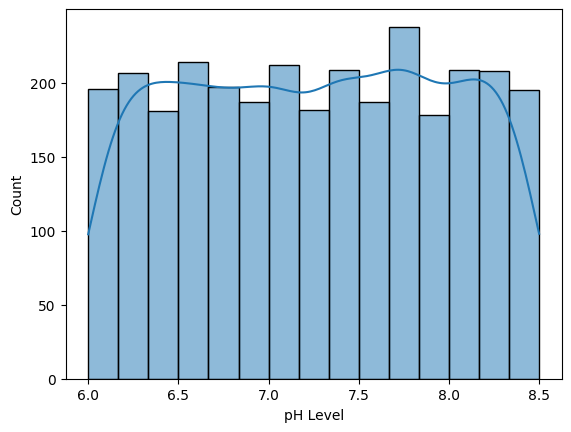

In [127]:
sns.histplot(df['pH Level'], kde=True)
# Save as PNG
plt.savefig('ph_level_distribution.png', dpi=300, bbox_inches='tight')

<Axes: xlabel='Lead Concentration (µg/L)'>

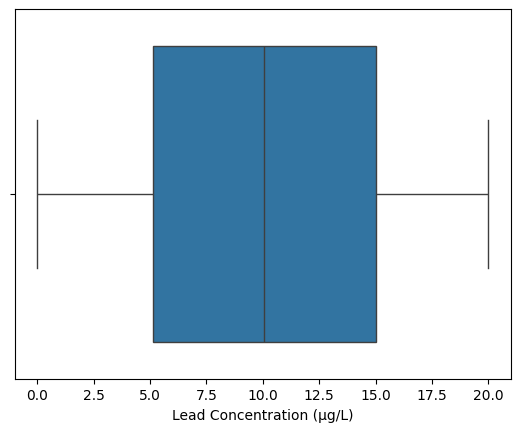

In [128]:
sns.boxplot(x=df['Lead Concentration (µg/L)'])


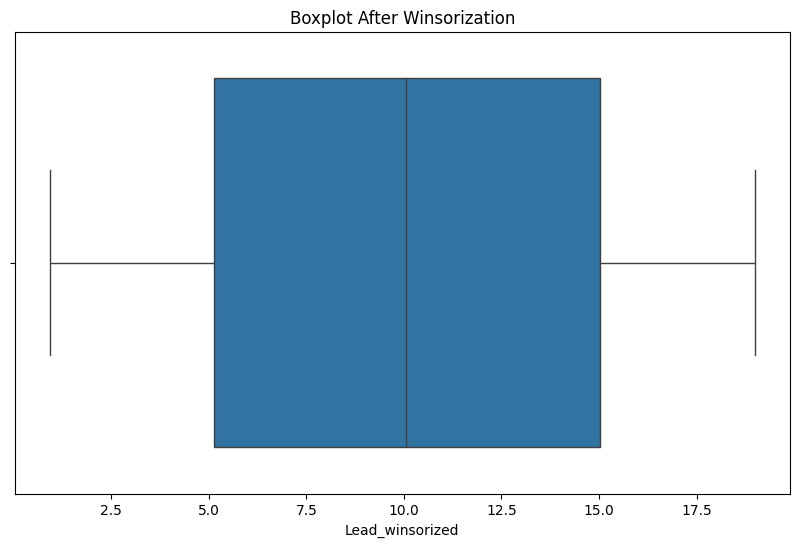

<Figure size 640x480 with 0 Axes>

In [129]:
#Dealing with outliers using Winsorization (Capping Values)
from scipy.stats.mstats import winsorize

# Winsorize at 5th and 95th percentiles
df['Lead_winsorized'] = winsorize(df['Lead Concentration (µg/L)'], limits=[0.05, 0.05])

# Visualize after winsorization
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Lead_winsorized'])
plt.title('Boxplot After Winsorization')
plt.show()
# Save as PNG
plt.savefig('Lead_winsorized.png', dpi=300, bbox_inches='tight')

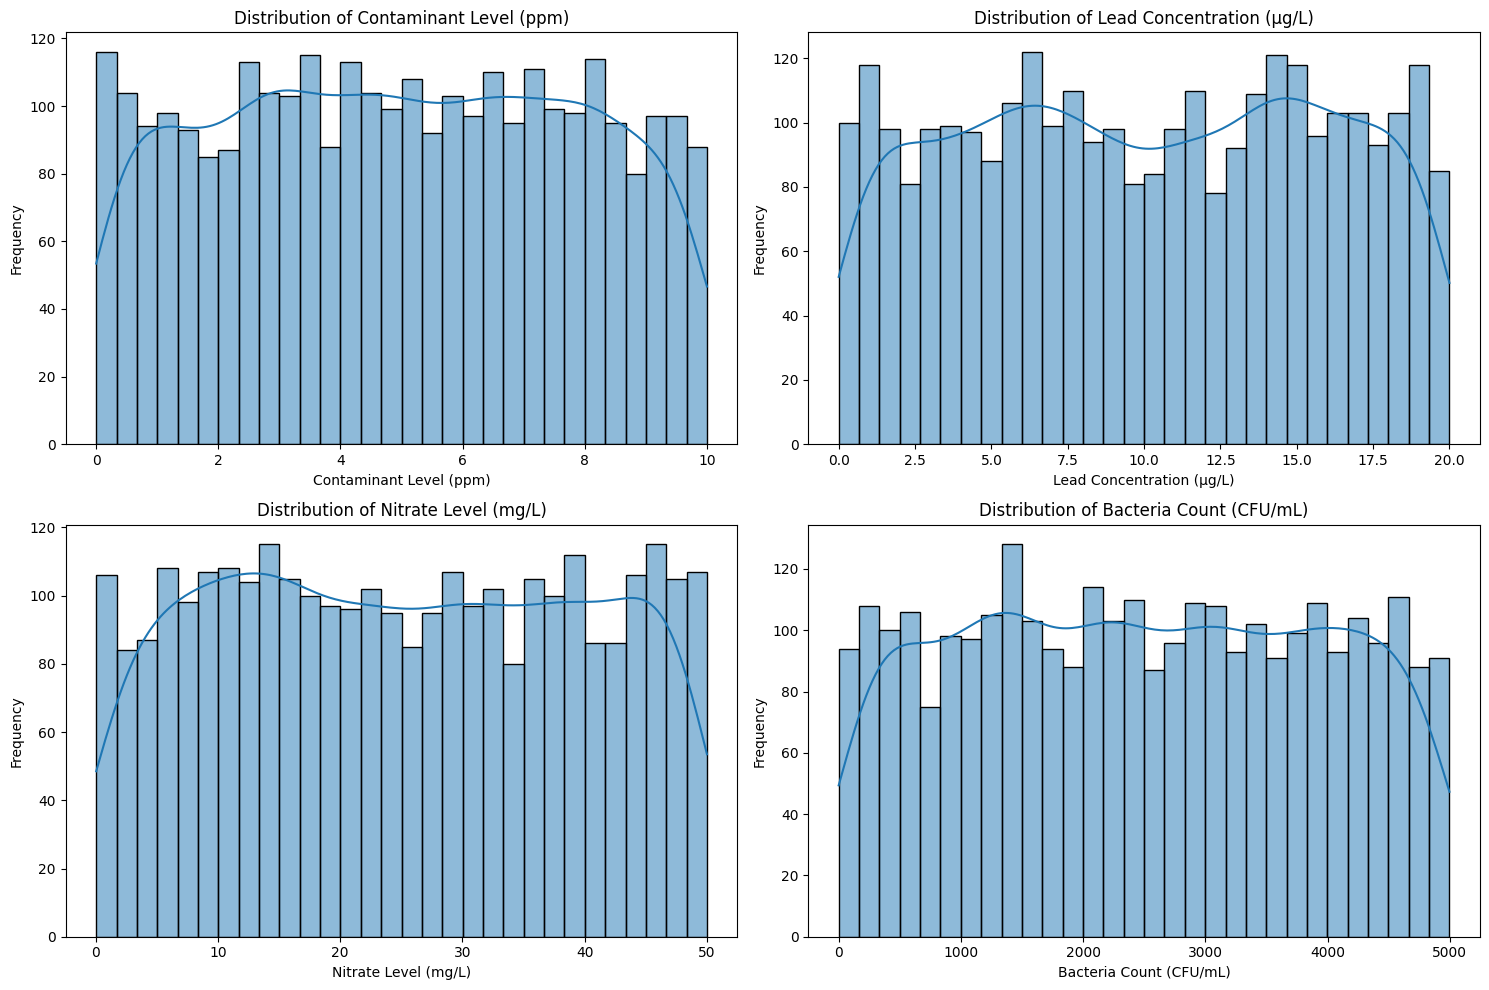

<Figure size 640x480 with 0 Axes>

In [130]:
# Visualize the distribution of key contaminants
contaminants = ['Contaminant Level (ppm)', 'Lead Concentration (µg/L)', 
                'Nitrate Level (mg/L)', 'Bacteria Count (CFU/mL)']

plt.figure(figsize=(15, 10))
for i, col in enumerate(contaminants, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
plt.savefig('contaminant_distributions.png', dpi=300, bbox_inches='tight')

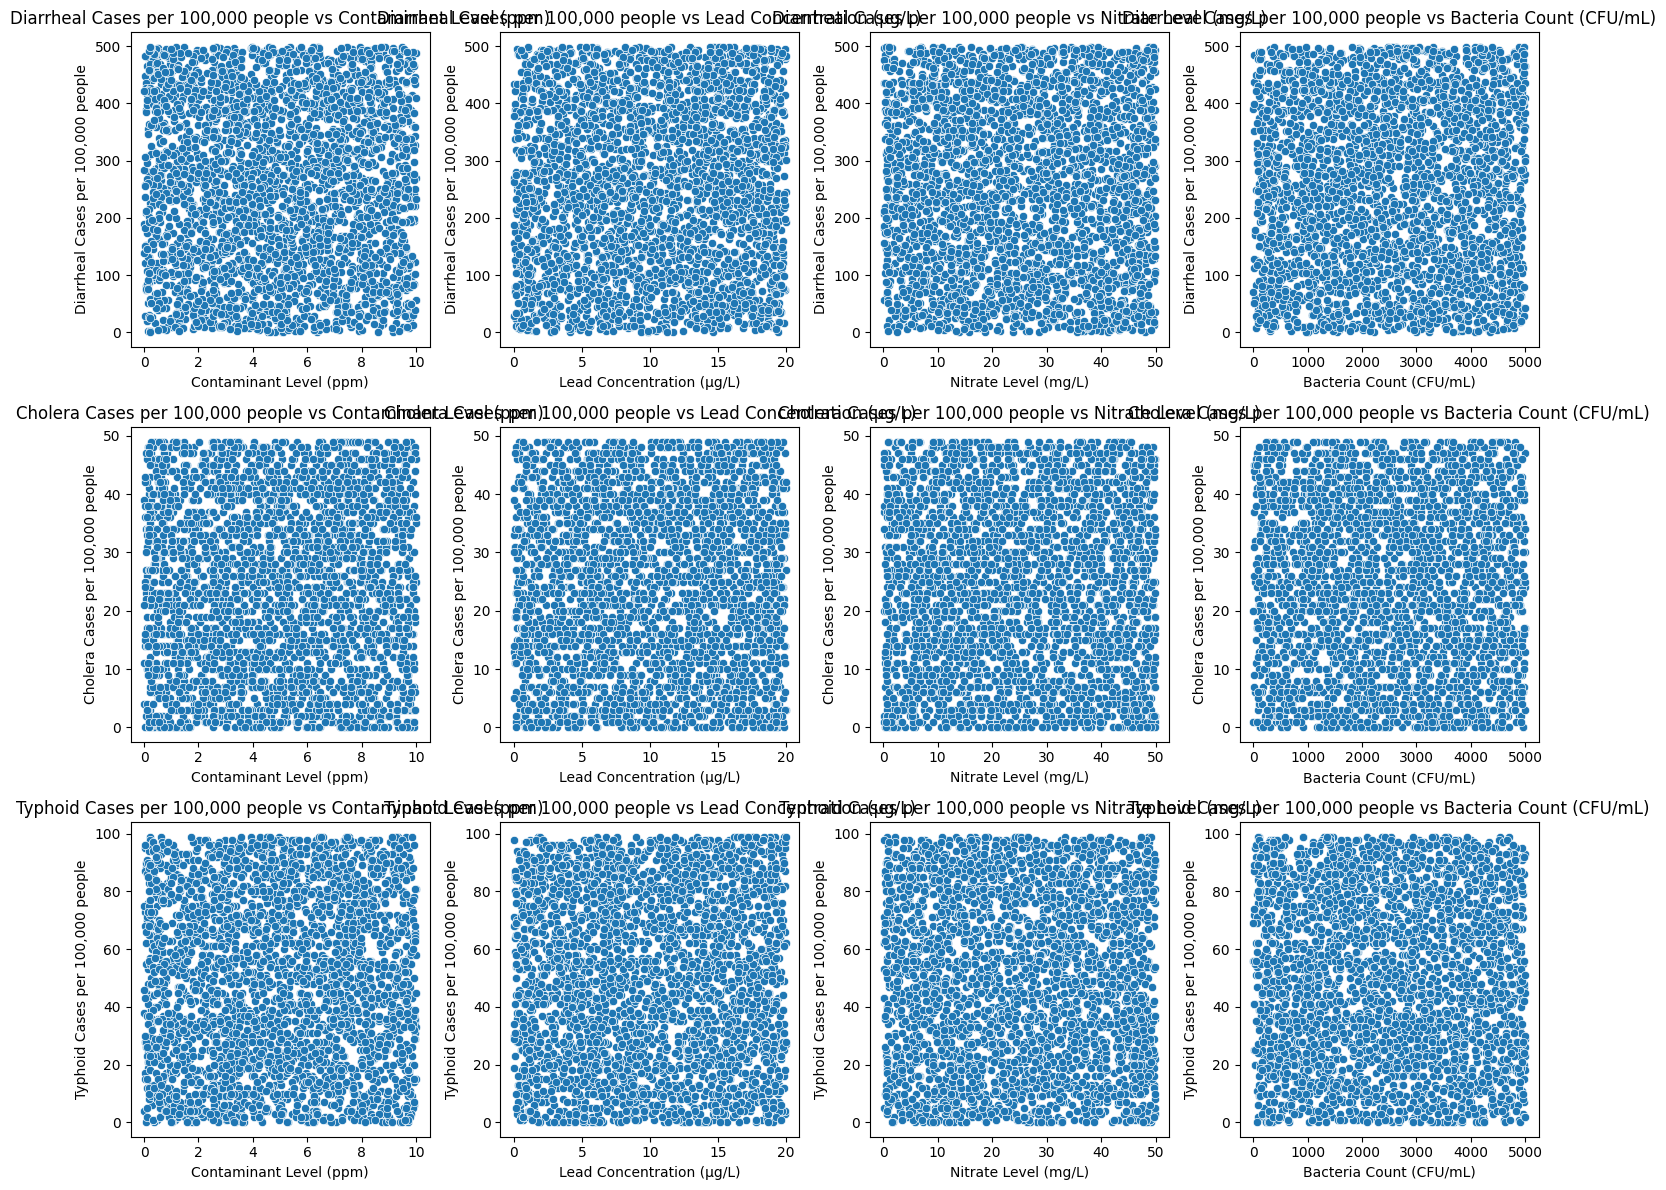

In [131]:
# Visualize relationships between contaminants and disease cases
diseases = ['Diarrheal Cases per 100,000 people', 
            'Cholera Cases per 100,000 people', 
            'Typhoid Cases per 100,000 people']
plt.figure(figsize=(15, 12))
for i, disease in enumerate(diseases, 1):
    for j, contaminant in enumerate(contaminants, 1):
        plt.subplot(3, 4, (i-1)*4 + j)
        sns.scatterplot(x=df[contaminant], y=df[disease])
        plt.title(f'{disease} vs {contaminant}')
plt.tight_layout()
plt.show()

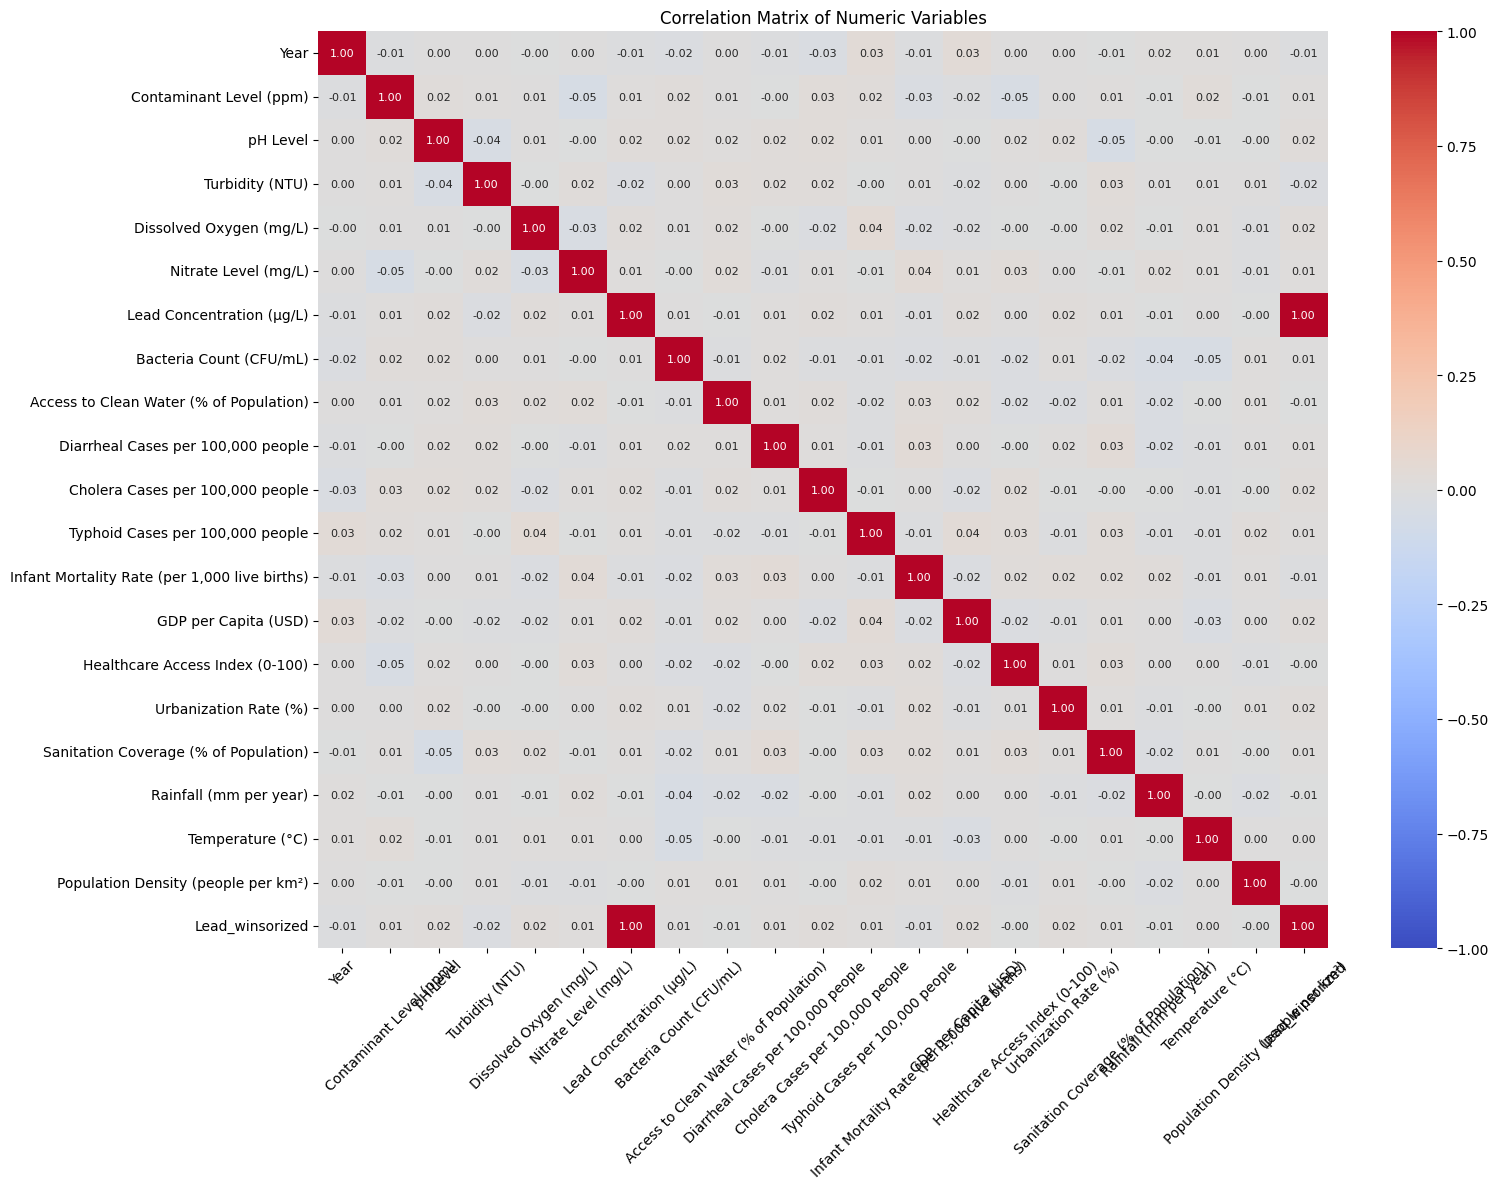

In [132]:
# Correlation analysis
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            annot_kws={"size": 8}, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

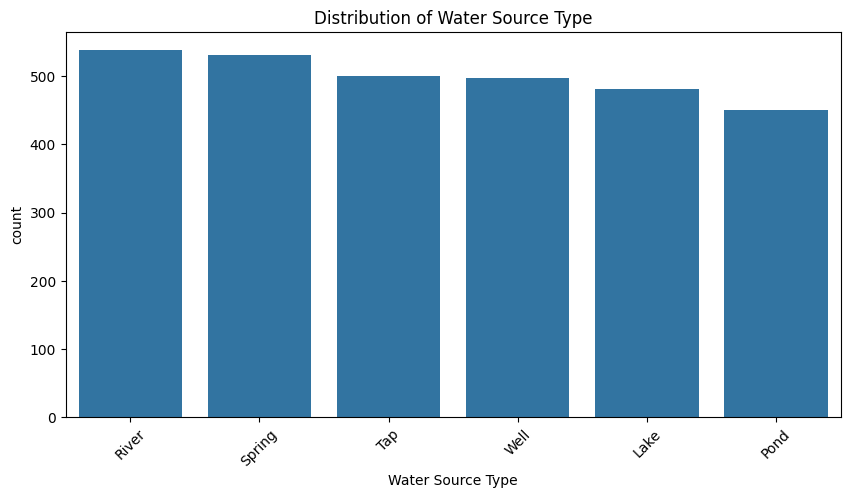

<Figure size 640x480 with 0 Axes>

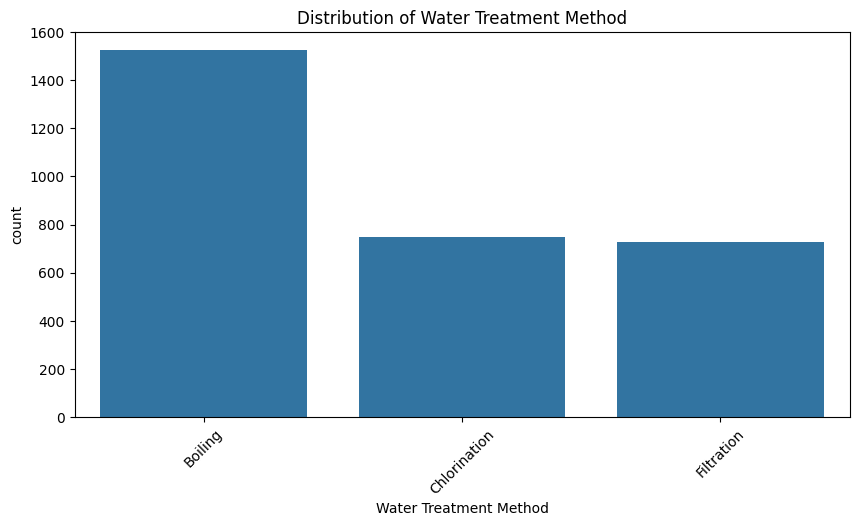

<Figure size 640x480 with 0 Axes>

In [133]:
# Analyze categorical variables
categorical_cols = [ 'Water Source Type', 'Water Treatment Method']
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()
# Save each plot with a unique filename
    filename = f'{col.replace(" ", "_").lower()}_distribution.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')


**DATA PREPROCESSING**

In [165]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [166]:
# Identify column types
numeric_cols = X.select_dtypes(include='number').columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

In [167]:
# Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

In [168]:
print(df.dtypes)

Country                                           object
Region                                            object
Year                                               int64
Water Source Type                                 object
Contaminant Level (ppm)                          float64
pH Level                                         float64
Turbidity (NTU)                                  float64
Dissolved Oxygen (mg/L)                          float64
Nitrate Level (mg/L)                             float64
Lead Concentration (µg/L)                        float64
Bacteria Count (CFU/mL)                            int64
Water Treatment Method                            object
Access to Clean Water (% of Population)          float64
Diarrheal Cases per 100,000 people                 int64
Cholera Cases per 100,000 people                   int64
Typhoid Cases per 100,000 people                   int64
Infant Mortality Rate (per 1,000 live births)    float64
GDP per Capita (USD)           

**DATA PREPROCESSING**

In [169]:
# Drop irrelevant columns (optional)
df_model = df.drop(['Country', 'Region'], axis=1)


In [170]:
#  One-hot encode all remaining object columns
df_model = pd.get_dummies(df_model)

In [171]:
# Create target variable (1 = contaminated, 0 = safe)
df['Water_Contaminated'] = (df['Contaminant Level (ppm)'] > 50).astype(int)

In [172]:
print(df['Water_Contaminated'].value_counts())


Water_Contaminated
0    3000
Name: count, dtype: int64


In [173]:
#Creating Threshold for Contamination
def label_contamination(row):
    if (
        row['pH Level'] < 6.5 or row['pH Level'] > 8.5 or
        row['Turbidity (NTU)'] > 5 or
        row['Dissolved Oxygen (mg/L)'] < 5 or
        row['Nitrate Level (mg/L)'] > 10 or
        row['Lead Concentration (µg/L)'] > 10 or
        row['Bacteria Count (CFU/mL)'] > 500 or
        row['Access to Clean Water (% of Population)'] < 50
    ):
        return 1  # Contaminated
    else:
        return 0  # Uncontaminated

df['Water_Contaminated'] = df.apply(label_contamination, axis=1)


In [174]:
#Identifying class distibution
print(df['Water_Contaminated'].value_counts())

Water_Contaminated
1    2986
0      14
Name: count, dtype: int64


In [175]:
# 3. Define features and target
X = df_model.drop('Water_Contaminated', axis=1)
y = df_model['Water_Contaminated']

In [176]:
!pip install imblearn

You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [177]:
# 4. Split before SMOTE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [178]:
# 5. Apply SMOTE only to training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [179]:
from collections import Counter

# Check class distribution BEFORE SMOTE (on the original training target)
print("Class distribution in y_train (before SMOTE):")
print(Counter(y_train))

# Check class distribution AFTER SMOTE (on the resampled training target)
print("\nClass distribution in y_train_resampled (after SMOTE):")
print(Counter(y_train_resampled))

Class distribution in y_train (before SMOTE):
Counter({1: 2390, 0: 10})

Class distribution in y_train_resampled (after SMOTE):
Counter({1: 2390, 0: 2390})


In [180]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

**RANDOM FOREST CLASSIFIER**

In [181]:
# Now train your model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [182]:
# Evaluate
from sklearn.metrics import classification_report
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.99      1.00      1.00       596

    accuracy                           0.99       600
   macro avg       1.00      0.62      0.70       600
weighted avg       1.00      0.99      0.99       600



In [183]:
# For probability threshold adjustment
y_probs = model.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [184]:
# Find optimal threshold (you may need to customize based on your needs)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
y_pred_optimal = (y_probs >= optimal_threshold).astype(int)

In [185]:
print("\nAdjusted Classification Report:")
print(classification_report(y_test, y_pred_optimal))


Adjusted Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.50      0.02         4
           1       1.00      0.73      0.84       596

    accuracy                           0.73       600
   macro avg       0.50      0.62      0.43       600
weighted avg       0.99      0.73      0.84       600



**LOGISTIC REGRESSION MODEL**

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [187]:
# --- 5. Train a Logistic Regression Model ---
model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000) # 'liblinear' is good for small datasets
model.fit(X_train, y_train)
print("\nLogistic Regression model trained successfully.")

# --- 6. Evaluate the Model ---
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1] # Probability of the positive class (1: Contaminated)

print("\n--- Logistic Regression Model Evaluation ---")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression model trained successfully.

--- Logistic Regression Model Evaluation ---
Accuracy: 0.9950

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.99      1.00      1.00       596

    accuracy                           0.99       600
   macro avg       1.00      0.62      0.70       600
weighted avg       1.00      0.99      0.99       600

